In [173]:
!nvidia-smi

Mon May 19 20:00:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P0             27W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [174]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
replace imbalanced_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: o
error:  invalid response [o]
replace imbalanced_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 0
error:  invalid response [0]
replace imbalanced_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: o
error:  invalid response [o]
replace imbalanced_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace raw_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [175]:
import pandas as pd

In [176]:
imbalance_data =pd.read_csv("/content/imbalanced_data.csv")

In [177]:
imbalance_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [178]:
imbalance_data.value_counts('label')
### From the value counts of each label it is clearly seen that the data is imbalanced.

,count
label,
0,29720
1,2242


In [179]:
##EDA

In [180]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

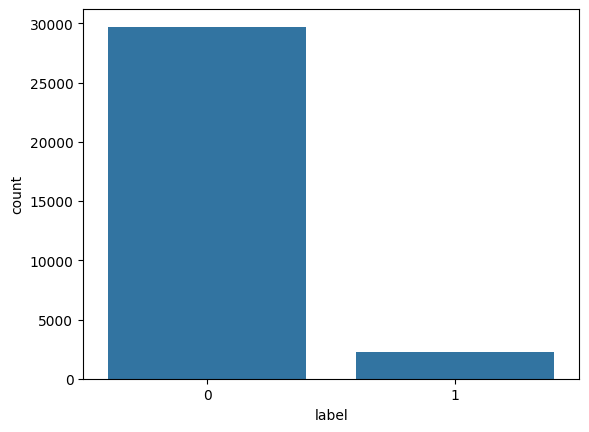

In [181]:
sns.countplot(x='label',data=imbalance_data)

In [182]:
imbalance_data.shape

(31962, 3)

In [183]:
##Checking null values
imbalance_data.isnull().sum()

,0
id,0
label,0
tweet,0


In [184]:
imbalance_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [185]:
## Dropping the unnecessary columns
imbalance_data.drop(['id'],axis=1,inplace=True)

In [186]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [187]:
raw_data = pd.read_csv("/content/raw_data.csv")

In [188]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [189]:
 raw_data.shape

(24783, 7)

In [190]:
raw_data.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [191]:
raw_data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],inplace=True,axis=1)

In [192]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [193]:
##Checking wheather the data is balance or imbalance
raw_data.value_counts('class')

,count
class,
1,19190
2,4163
0,1430


In [194]:
raw_data['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


<Axes: xlabel='class', ylabel='count'>

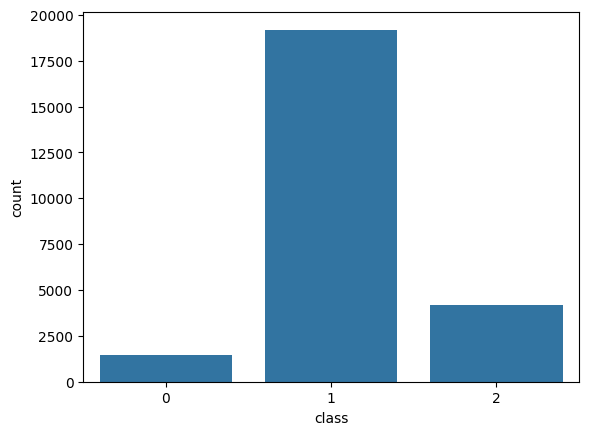

In [195]:
sns.countplot(data=raw_data,x='class')

- class 0 : hate
- class 1 : abusive
- class 2 : no hate

In [196]:
## Lets copy the values of the class 1 into class 0
raw_data[raw_data['class']==0]['class'] = 1

<ipython-input-196-f84b7270663a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class']==0]['class'] = 1


In [197]:
raw_data.value_counts('class')

,count
class,
1,19190
2,4163
0,1430


In [198]:
raw_data['class'].unique()

array([2, 1, 0])

In [199]:
##replace the value of 0 to 1
raw_data['class'].replace({0:1},inplace=True)

<ipython-input-199-e5f6fb3169e8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['class'].replace({0:1},inplace=True)


In [200]:
raw_data['class'].unique()

array([2, 1])

<Axes: xlabel='class', ylabel='count'>

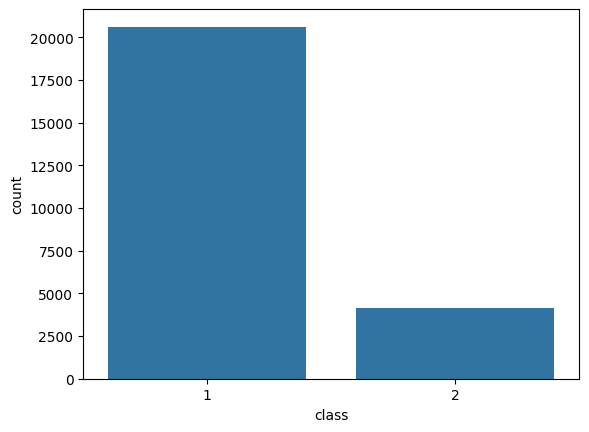

In [201]:
sns.countplot(data=raw_data,x='class')

In [202]:
raw_data['class'].replace({2:0},inplace=True)

<ipython-input-202-5037d1b085d7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['class'].replace({2:0},inplace=True)


<Axes: xlabel='class', ylabel='count'>

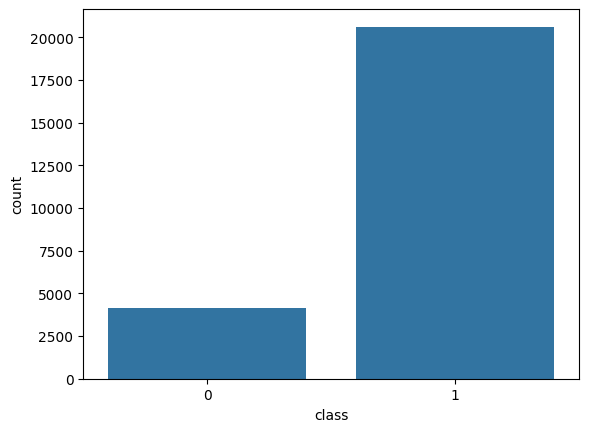

In [203]:
sns.countplot(data=raw_data,x='class')

- class 0 : hate
- class 1 : No hate

In [204]:
raw_data.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [205]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [206]:
raw_data.rename(columns={'class':'label'},inplace=True)

In [207]:
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [208]:
#Lets concatinate both the data into single data frame

frame = [imbalance_data,raw_data]
df = pd.concat(frame)

In [209]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

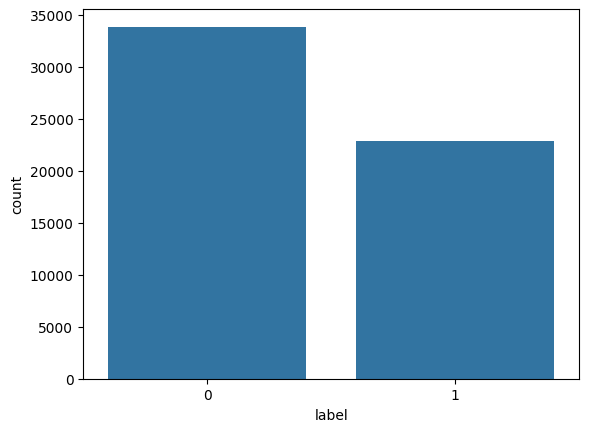

In [210]:
sns.countplot(data=df,x='label')

In [211]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [212]:
stemmer = SnowballStemmer('english')
stopword = set(stopwords.words('english'))


In [213]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [214]:
df['tweet'][1]

,tweet
1,@user @user thanks for #lyft credit i can't us...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...


In [215]:
df['tweet'] = df['tweet'].apply(data_cleaning)


In [216]:
df['tweet'][1]

,tweet
1,user user thanks for lyft credit i cant use ca...
1,rt boy dats coldtyga dwn bad for cuffin dat ...


In [217]:
df.head()

,label,tweet
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesti bihday your majesti ...
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motiv factsguide s...


In [218]:
x,y=df['tweet'],df['label']


In [219]:
from sklearn.model_selection import train_test_split

In [220]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [221]:
y_test.head()

,label
12238,1
14377,0
17207,1
22168,1
18801,0


In [222]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [223]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words,oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [ ]:
tokenizer.word_index  ##tokenizer.word_index is a dictionary that maps each word in your training data to a unique integer index based on frequency (most frequent words get the lowest indices).

{'<OOV>': 1,
 'the': 2,
 'to': 3,
 'a': 4,
 'user': 5,
 'i': 6,
 'you': 7,
 'and': 8,
 'in': 9,
 'of': 10,
 'my': 11,
 'is': 12,
 'rt': 13,
 'bitch': 14,
 'for': 15,
 'that': 16,
 'on': 17,
 'be': 18,
 'it': 19,
 'this': 20,
 'with': 21,
 'me': 22,
 'like': 23,
 'so': 24,
 'all': 25,
 'your': 26,
 'im': 27,
 'love': 28,
 'are': 29,
 'just': 30,
 'have': 31,
 'when': 32,
 'at': 33,
 'amp': 34,
 'but': 35,
 'not': 36,
 'up': 37,
 'dont': 38,
 'u': 39,
 'get': 40,
 'day': 41,
 'if': 42,
 'its': 43,
 'do': 44,
 'was': 45,
 'they': 46,
 'bitches': 47,
 'we': 48,
 'no': 49,
 'out': 50,
 'will': 51,
 'what': 52,
 'about': 53,
 'as': 54,
 'got': 55,
 'from': 56,
 'how': 57,
 'can': 58,
 'hoes': 59,
 'happy': 60,
 'her': 61,
 'now': 62,
 'time': 63,
 'one': 64,
 'he': 65,
 'she': 66,
 'pussy': 67,
 'ass': 68,
 'cant': 69,
 'these': 70,
 'shit': 71,
 'who': 72,
 'fuck': 73,
 'want': 74,
 'know': 75,
 'or': 76,
 'some': 77,
 'life': 78,
 'go': 79,
 'people': 80,
 'see': 81,
 'good': 82,
 'by': 83

In [224]:
sequences_matrix


array([[    0,     0,     0, ...,    59,    18,   159],
       [  148, 22640, 22641, ...,     3,  3830,   148],
       [    0,     0,     0, ...,    18,     1,     1],
       ...,
       [ 1124,   685,  2775, ...,   184,     2, 34956],
       [    0,     0,     0, ...,   959, 15086,   782],
       [    0,     0,     0, ...,   423,   399,    14]], dtype=int32)

In [225]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop

In [235]:
# Creating model architecture.
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, max_len))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 300, 100)       │     5,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_6             │ (None, 300, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,080,501 (19.38 MB)

 Trainable params: 5,080,501 (19.38 MB)

 Non-trainable params: 0 (0.00 B)

In [236]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [237]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 300, 100)       │     5,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_6             │ (None, 300, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,080,501 (19.38 MB)

 Trainable params: 5,080,501 (19.38 MB)

 Non-trainable params: 0 (0.00 B)

In [238]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)

284/284 ━━━━━━━━━━━━━━━━━━━━ 287s 983ms/step - accuracy: 0.8476 - loss: 0.3431 - val_accuracy: 0.9438 - val_loss: 0.1571


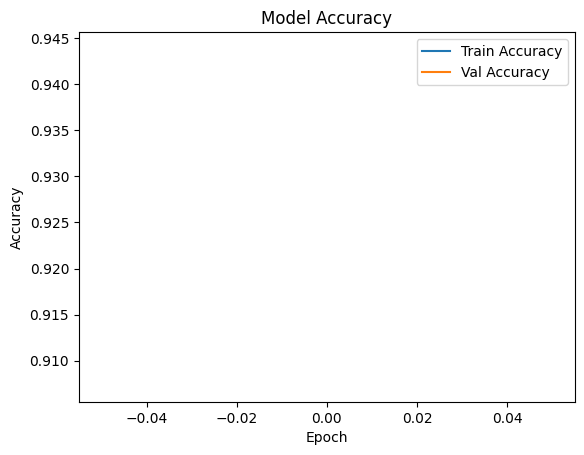

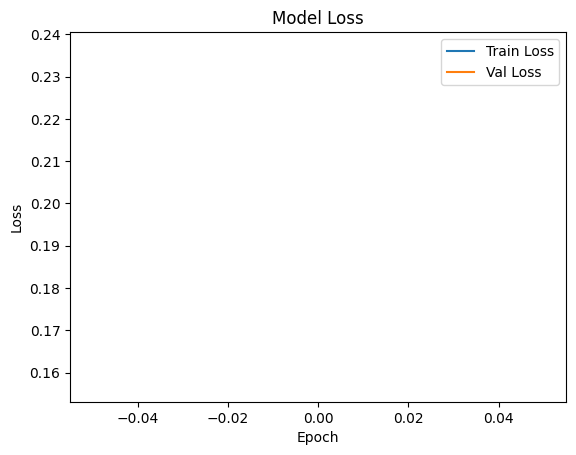

In [242]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [241]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [243]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [244]:
test_sequences_matrix

array([[  406,   602,    36, ...,    12,    30,     1],
       [   13,     1,     2, ...,     4,     1, 18480],
       [    0,     0,     0, ...,   275,   345,  1467],
       ...,
       [    0,     0,     0, ...,     1,     1, 46910],
       [    0,     0,     0, ...,     9,   289,   290],
       [    0,     0,     0, ...,  6753,    22,   150]], dtype=int32)

In [245]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

355/355 ━━━━━━━━━━━━━━━━━━━━ 60s 168ms/step - accuracy: 0.9361 - loss: 0.1715


In [247]:
lstm_prediction = model.predict(test_sequences_matrix)

355/355 ━━━━━━━━━━━━━━━━━━━━ 59s 165ms/step


In [248]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [249]:
from sklearn.metrics import confusion_matrix

In [250]:
print(confusion_matrix(y_test,res))

[[6527  209]
 [ 525 4088]]


In [251]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [256]:
# Let's save the mdoel.
model.save("model.h5")

In [257]:
import keras

In [258]:
load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [272]:
# Let's test our model on custom data.
test = 'model i love u take with u all the time in u.'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


model i love u take with u all the time in u.
model i love u take with u all the time in u
['model love u take u time u']
[[241, 28, 39, 101, 39, 63, 39]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
pred [[0.06322138]]
no hate


In [274]:
y_train

,label
1085,1
12244,1
5260,0
20863,1
8952,0
...,...
22381,1
6196,1
860,1
15795,0
